## Problem Statement

The Company maintains a database of the employees and their details. Based on this dataset the requirememt is to create the classification model using K Nearest Neighbour to predict if the employee will leave the company or not (attrition rate). 

**Data Dictionary**

**Age** - Age of the employee 

**Attrition** - Dependent variable, if employee will leave or not

**BusinessTravel** - How frequently employee travels for business       

**DailyRate** - Daily rate of an employee                    

**Department** - Which department employee belongs to                  

**DistanceFromHome** - How far employee stays from the office             

**EducationField** - Education field of the employee              

**EnvironmentSatisfaction** -  Rating of satisfaction     

**Gender** -  Gender of an employee                     

**HourlyRate** -  Hourly Rate of an employee                  

**JobRole** - Job role of an employee                     

**JobSatisfaction** - Job satisfaction rating              

**MaritalStatus** - Marital status of an employee               

**MonthlyIncome** - Monthly Income of an employee               

**MonthlyRate** -  Monthly rate of an employee                 

**NumCompaniesWorked** - Number of companies employee worked on                                 

**OverTime** -  Is employee working overtime                   

**PercentSalaryHike** - Percentage salary hike of an employee            

**PerformanceRating** - Performance rating of an employee             

**StandardHours** -  Standard working hours of an employee                            

**TotalWorkingYears** - Total working years of an employee            

**TrainingTimesLastYear** - Total training time        

**WorkLifeBalance** -  Work life balance rating             

**YearsAtCompany** - Years at the current company               

**YearsInCurrentRole** - Years at the current role           

**YearsSinceLastPromotion** - Year since last promotion      

**YearsWithCurrManager** - Years with current manager         

# Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Understand the Data](#read)**
    - 2.2 - **[Exploratory Data Analysis](#eda)**
    - 2.3 - **[Missing Value Treatment](#null)**
    - 2.4 - **[Encoding and Feature Scaling](#enc)**
3. **[Splitting the data into Train and Test](#sd)**
4. **[Creating the model on training dataset](#model)**
5. **[Run the model on the Test Dataset](#test)**
6. **[Check the accuracy of the model](#acc)**
    - 6.1 - **[Accuracy Score](#accscore)**
    - 6.2 - **[Confusion Matrix](#cm)**
    - 6.3 - **[ROC Curve](#roc)**
    - 6.4 - **[F1 Score](#f1score)**
7. **[Comparing the Training and Testing Accuracies](#overunder)**
8. **[Applying K-Fold Cross Validation to find the best value of K](#kfcv)**
9. **[Applying Weighted K-Nearest Neighbour](#wknn)**

<a id="lib"></a>
# 1. Import Libraries

In [5]:
#Importing the libraries which will be helpful for the data analysis. 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 

<a id="prep"></a>
# 2. Data Preparation

In [7]:
#Importing the dataset which we will use for the modelling 

dataset = pd.read_csv('HR-Employee-Attrition.csv')

<a id="read"></a>
# 2.1. Understand the Data

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   DailyRate                1470 non-null   int64 
 4   Department               1470 non-null   object
 5   DistanceFromHome         1470 non-null   int64 
 6   EducationField           1470 non-null   object
 7   EnvironmentSatisfaction  1470 non-null   int64 
 8   Gender                   1470 non-null   object
 9   HourlyRate               1470 non-null   int64 
 10  JobRole                  1470 non-null   object
 11  JobSatisfaction          1470 non-null   int64 
 12  MaritalStatus            1470 non-null   object
 13  MonthlyIncome            1470 non-null   int64 
 14  MonthlyRate              1470 non-null  

In [10]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'EducationField', 'EnvironmentSatisfaction',
       'Gender', 'HourlyRate', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<a id="eda"></a>
# 2.2. Exploratory Data Analysis

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 1500x200 with 0 Axes>

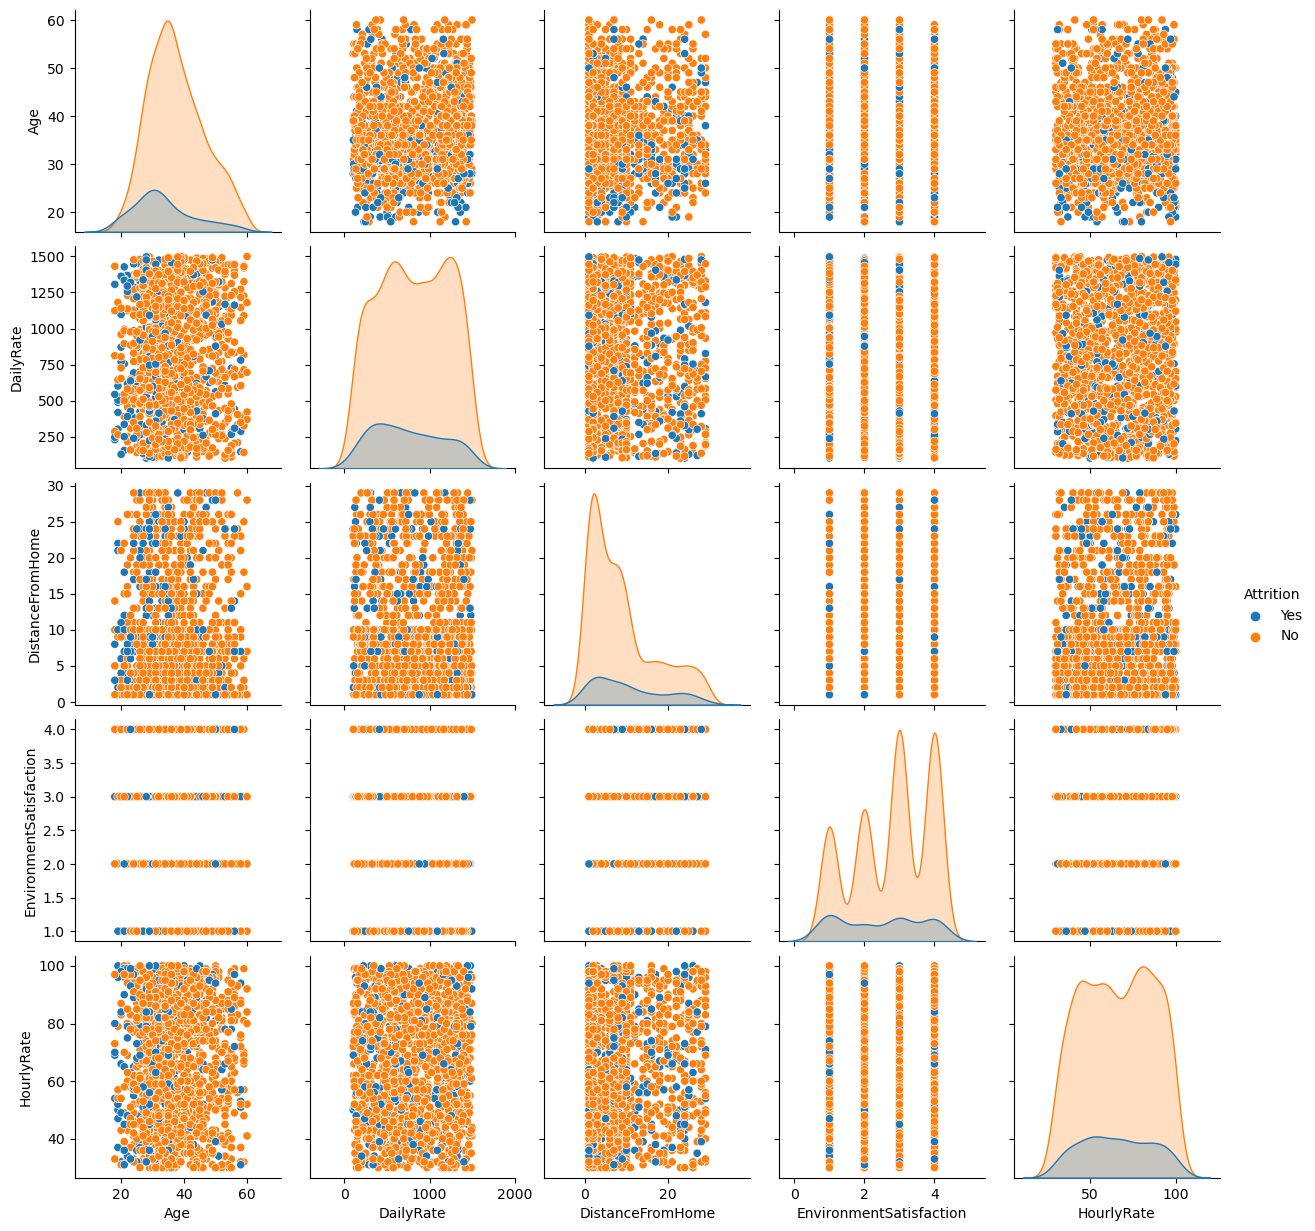

In [12]:
plt.figure(figsize=(15,2))
sns.pairplot(dataset[['Age',  'DailyRate','DistanceFromHome', 'EnvironmentSatisfaction','HourlyRate','Attrition']],hue='Attrition')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 1500x200 with 0 Axes>

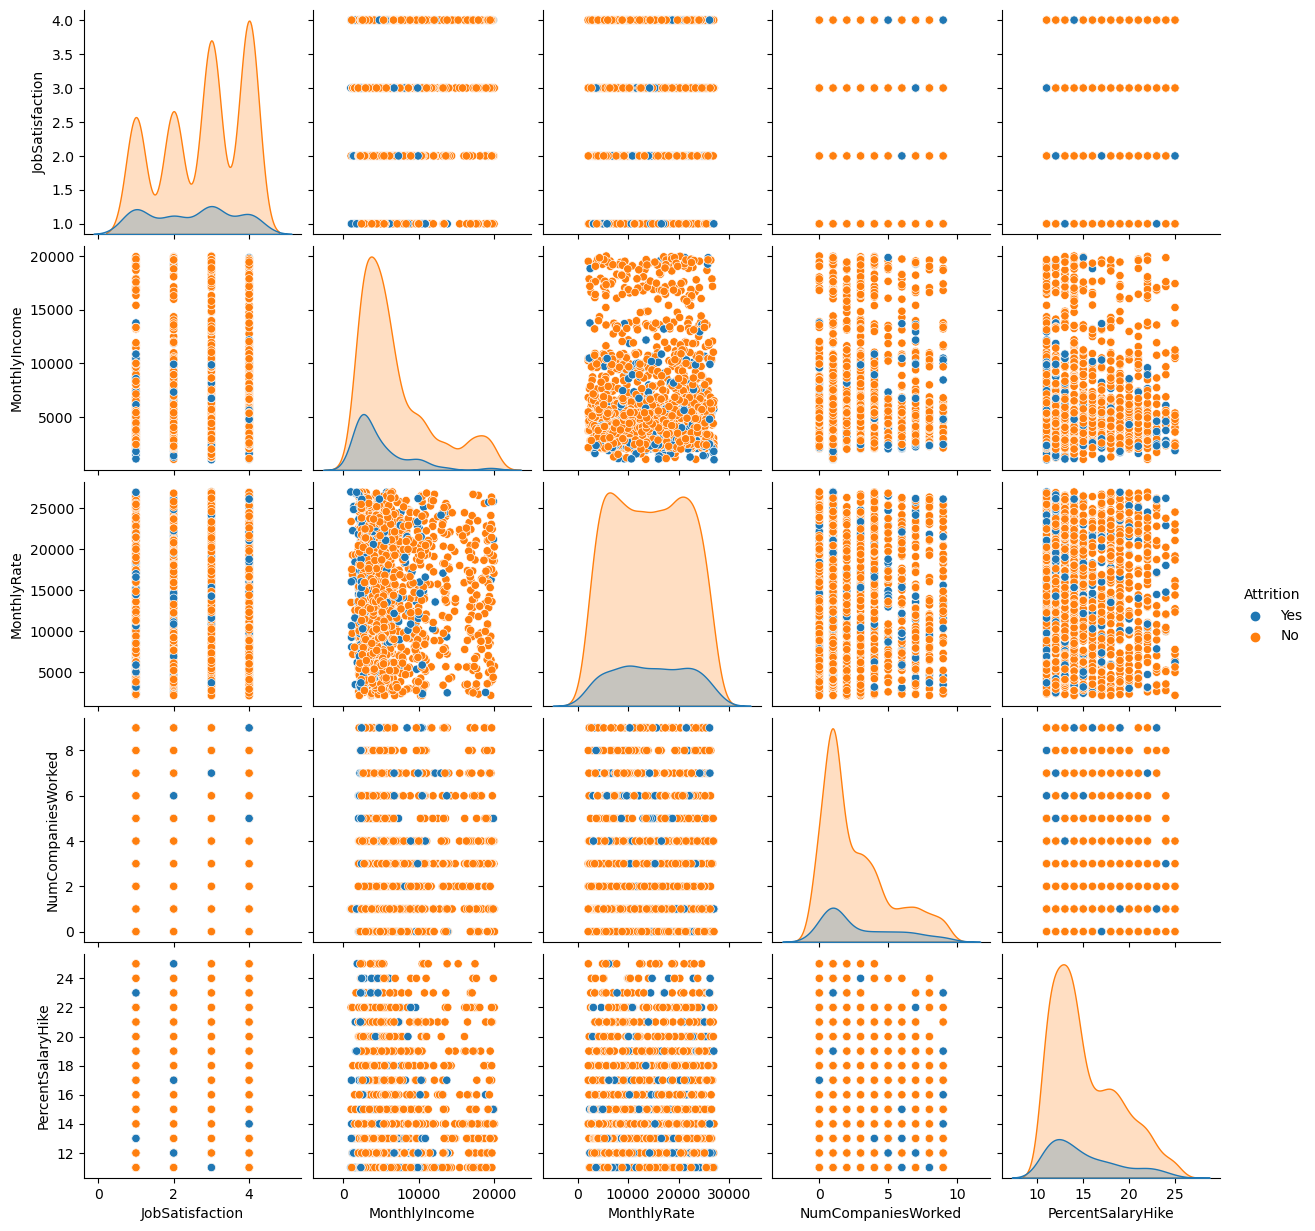

In [13]:
plt.figure(figsize=(15,2))
sns.pairplot(dataset[['JobSatisfaction','MonthlyIncome','MonthlyRate', 'NumCompaniesWorked',    'PercentSalaryHike','Attrition']],hue='Attrition')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

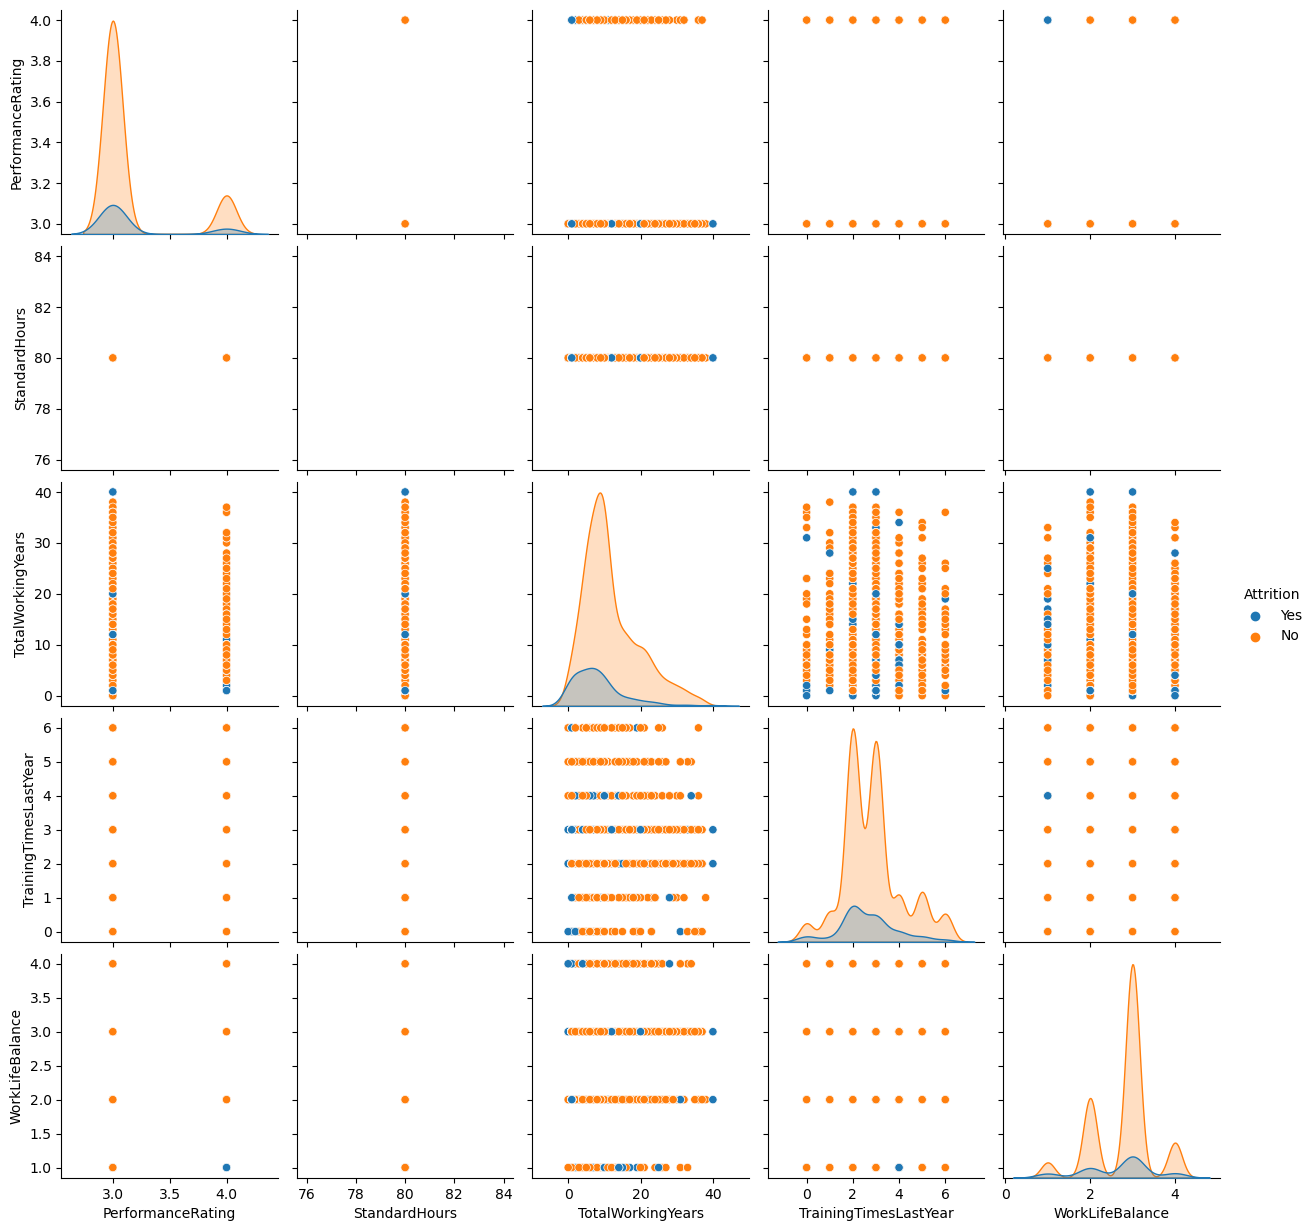

In [14]:
sns.pairplot(dataset[['PerformanceRating', 'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'Attrition']],hue='Attrition')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

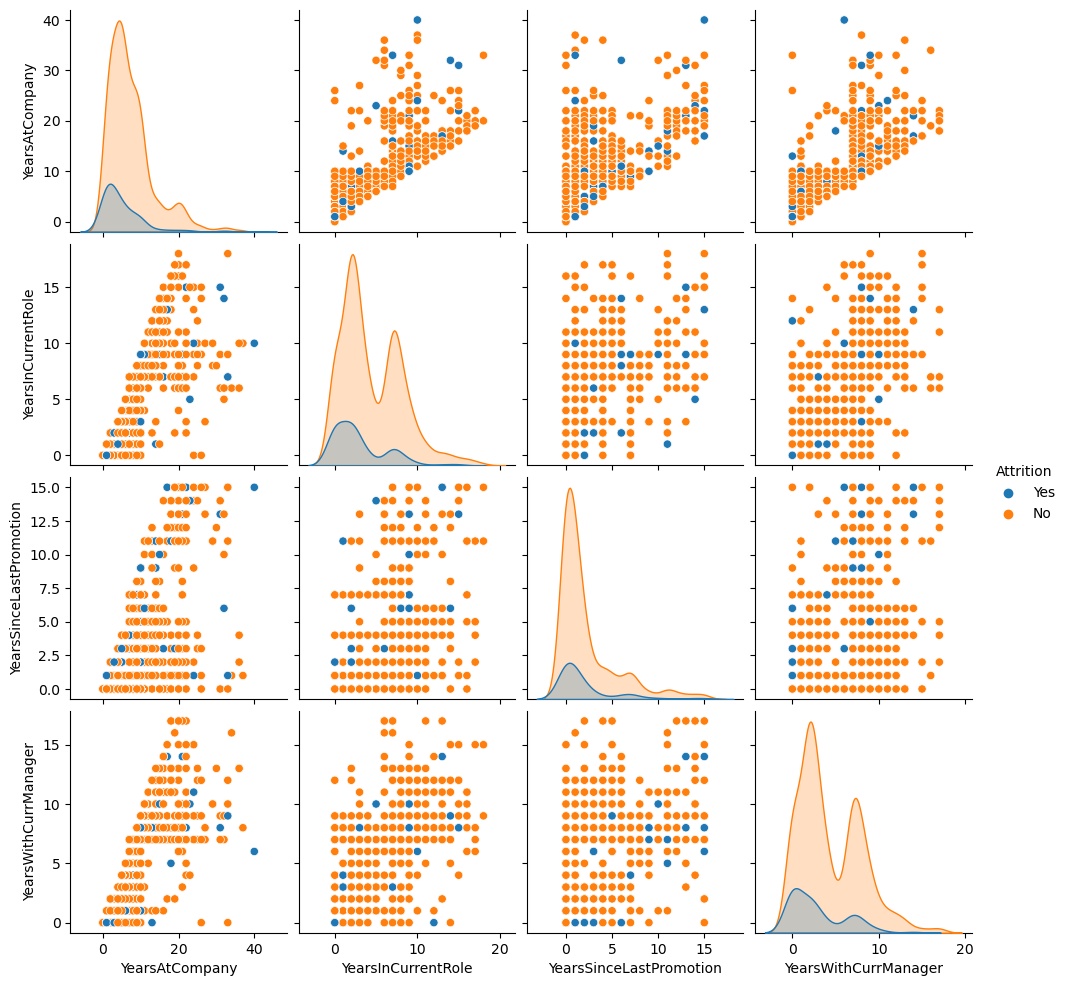

In [15]:
sns.pairplot(dataset[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager','Attrition']],hue='Attrition')

**From the above charts where we have used the numerical features we are not seeing any significant patterns in the dataset**

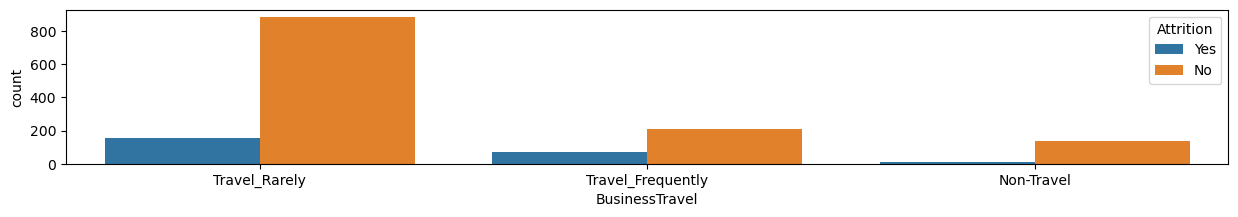

In [17]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'BusinessTravel',hue='Attrition')
plt.show()

**From the above chart we can say that employees who are travelling rare are more prone to leave the company**

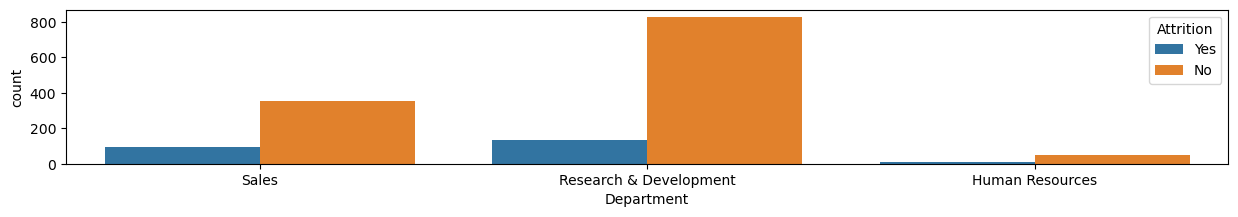

In [19]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'Department',hue='Attrition')
plt.show()

**From the above chart we can say that the employees who are working in the R&D Department are more willing to leave the company**

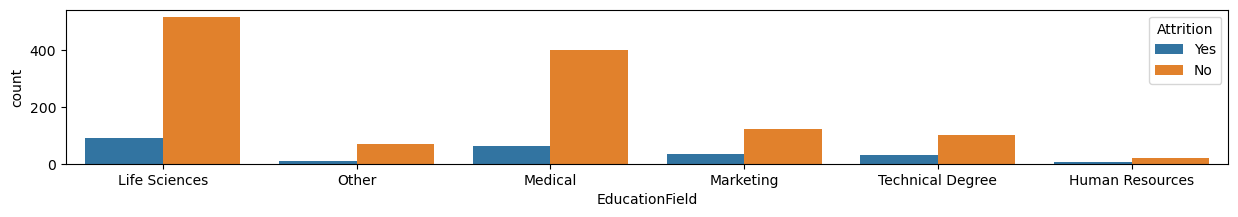

In [21]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'EducationField',hue='Attrition')
plt.show()

**From the above chart we can say that the employees who are having a life sciences and Medical background of education are more willing to leave the company**

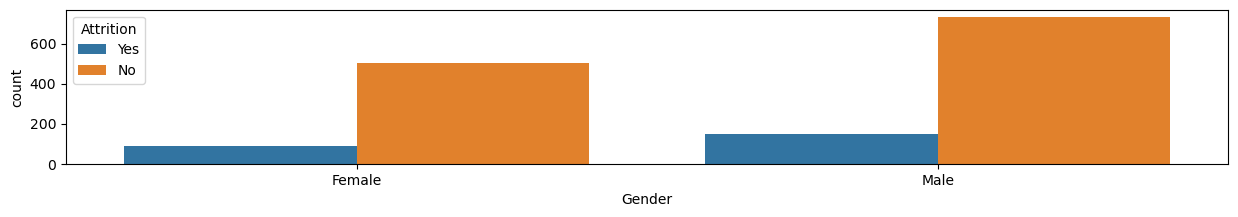

In [23]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'Gender',hue='Attrition')
plt.show()

**There is no significant insights coming from the gender**

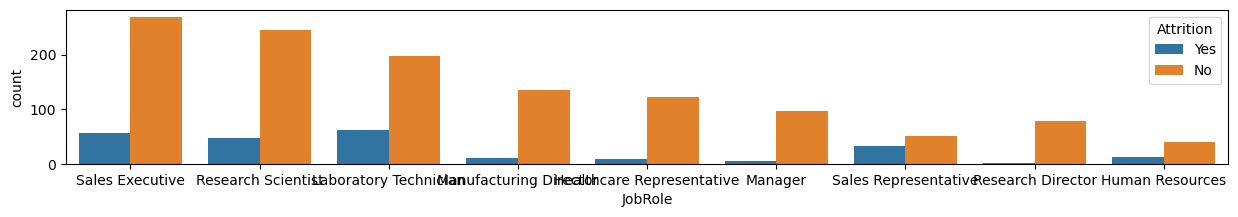

In [25]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'JobRole',hue='Attrition')
plt.show()

**There is no significant insights coming from the Job role**

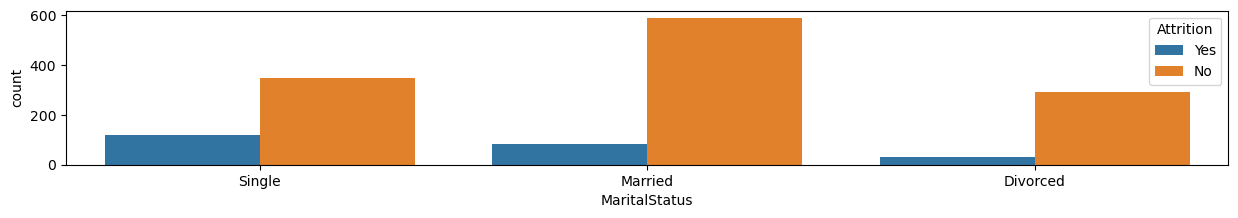

In [27]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'MaritalStatus',hue='Attrition')
plt.show()

**There is no significant insights coming from the Marital Status**

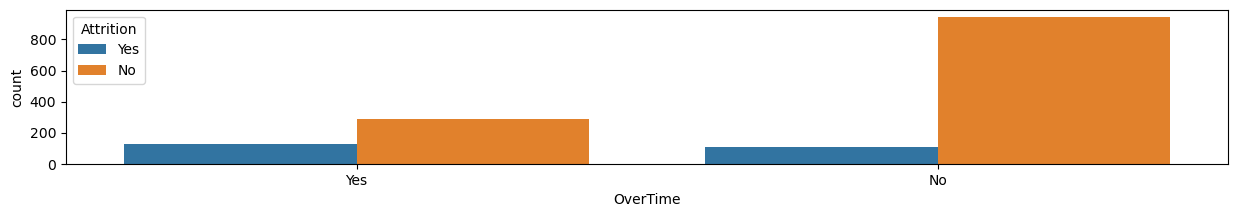

In [29]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'OverTime',hue='Attrition')
plt.show()

**Employees who are not doing overtime are more prone to leave the company**

<a id="null"></a>
# 2.3. Missing Value Treatment

In [32]:
#Checking the count of the missing values percentage, there are very few missing values there in the dataset
dataset.isnull().sum()/len(dataset)*100

Age                        0.0
Attrition                  0.0
BusinessTravel             0.0
DailyRate                  0.0
Department                 0.0
DistanceFromHome           0.0
EducationField             0.0
EnvironmentSatisfaction    0.0
Gender                     0.0
HourlyRate                 0.0
JobRole                    0.0
JobSatisfaction            0.0
MaritalStatus              0.0
MonthlyIncome              0.0
MonthlyRate                0.0
NumCompaniesWorked         0.0
OverTime                   0.0
PercentSalaryHike          0.0
PerformanceRating          0.0
StandardHours              0.0
TotalWorkingYears          0.0
TrainingTimesLastYear      0.0
WorkLifeBalance            0.0
YearsAtCompany             0.0
YearsInCurrentRole         0.0
YearsSinceLastPromotion    0.0
YearsWithCurrManager       0.0
dtype: float64

In [33]:
#Missing Value Imputation - We can impute the missing values using the methods of mean, median and mode based on the various scenarios
#When there is a numerical field we can populate the missing values using mean or median, 
#if there are outliers in the dataset we use to populate the missing values using median else mean
#When we want to populate the missing values in the categorial files we go with mode as an option

<a id="enc"></a>
# 2.4. Encoding and Feature Scaling

In [35]:
# Separating the numerical and categorical columns
from sklearn.preprocessing import StandardScaler
def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(dataset)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(dataset)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(dataset, categorical):
    """
    Function to automate the process of encoding the categorical data
    :param dataset: Dataframe
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset = encoding(dataset, categorical)

def feature_scaling(dataset, numerical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical])
    return dataset

dataset = feature_scaling(dataset, numerical)

In [36]:
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,2,0.742527,2,-1.010909,1,-0.660531,0,1.383138,...,-1.150554,-0.426230,0.0,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,1,-1.297775,1,-0.147150,1,0.254625,1,-0.240677,...,2.129306,2.346151,0.0,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,2,1.414363,1,-0.887515,4,1.169781,1,1.284725,...,-0.057267,-0.426230,0.0,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,1,1.461466,1,-0.764121,1,1.169781,0,-0.486709,...,-1.150554,-0.426230,0.0,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,2,-0.524295,1,-0.887515,3,-1.575686,1,-1.274014,...,-0.877232,-0.426230,0.0,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0,1,0.202082,1,1.703764,3,0.254625,1,-1.224807,...,0.489376,-0.426230,0.0,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,0,2,-0.469754,1,-0.393938,3,1.169781,1,-1.175601,...,-0.057267,-0.426230,0.0,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,0,2,-1.605183,1,-0.640727,1,-0.660531,1,1.038693,...,1.309341,2.346151,0.0,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,0,1,0.546677,2,-0.887515,3,1.169781,1,-0.142264,...,-0.330589,-0.426230,0.0,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


<a id="sd"></a>
# 3. Splitting the data into Train and Test

In [38]:
#Splitting all the independent variables in one array
x = dataset.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values 

In [39]:
#Splitting the dependent variable in one array
y = dataset.iloc[:,1].values

In [40]:
#Splitting the dataset into train and test based on the 70-30 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

<a id="model"></a>
# 4. Creating the model on training dataset

In [42]:
#Applying the K-Nearest Neighbour on the training dataset
from sklearn.neighbors import KNeighborsClassifier
knnmodel_ini = KNeighborsClassifier()
knnmodel_ini.fit(x_train,y_train)

KNeighborsClassifier()

<a id="test"></a>
# 5. Run the model on the Test Dataset

In [44]:
#Running the model on the test dataset
y_pred_ini = knnmodel_ini.predict(x_test)

<a id="acc"></a>
# 6. Check the accuracy of the model

In [46]:
#Importing all the functions to for checking the accuracies
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score, log_loss,RocCurveDisplay




<a id="accscore"></a>
# 6.1. Accuracy Score

In [48]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_ini)

0.8208616780045351

<a id="cm"></a>
# 6.2. Confusion Matrix

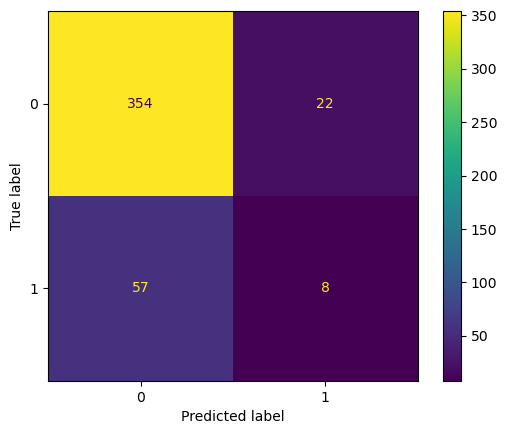

In [50]:
#Using confusion matrix we are checking the accuracy on the testing dataset
cm = confusion_matrix(y_test, y_pred_ini)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knnmodel_ini.classes_)
disp.plot()

<a id="roc"></a>
# 6.3. RO Curve

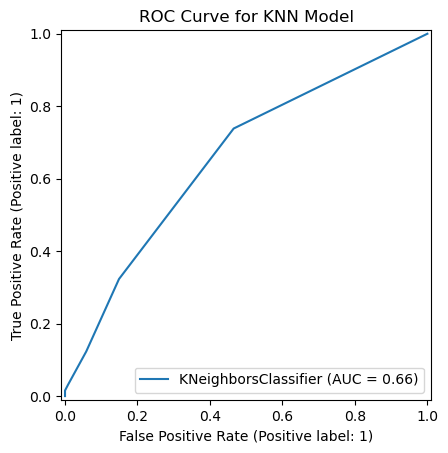

In [52]:
#Using ROC Curve we are checking the accuracy on the testing dataset
RocCurveDisplay.from_estimator(knnmodel_ini, x_test, y_test)
plt.title("ROC Curve for KNN Model")
plt.show()


<a id="f1score"></a>
# 6.4. F1 Score

In [54]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(y_test,knnmodel_ini.predict(x_test),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.86      0.94      0.90       376
 Positive(1)       0.27      0.12      0.17        65

    accuracy                           0.82       441
   macro avg       0.56      0.53      0.53       441
weighted avg       0.77      0.82      0.79       441



<a id="overunder"></a>
# 7. Comparing the Training and Testing Accuracies

In [56]:
#Storing the predicted values of training dataset in y_pred_train
y_pred_train = knnmodel_ini.predict(x_train)

In [57]:
#Checking the accuracy of training dataset 
accuracy_score(y_train,y_pred_train)

0.8668610301263362

In [58]:
#Checking the accuracy of testing dataset
accuracy_score(y_test,y_pred_ini)

0.8208616780045351

**Conclusion:** As there is very less difference between the accuracy of training and testing dataset we are good to go with the model

<a id="kfcv"></a>
# 8. Applying K-Fold Cross Validation to find the best value of K

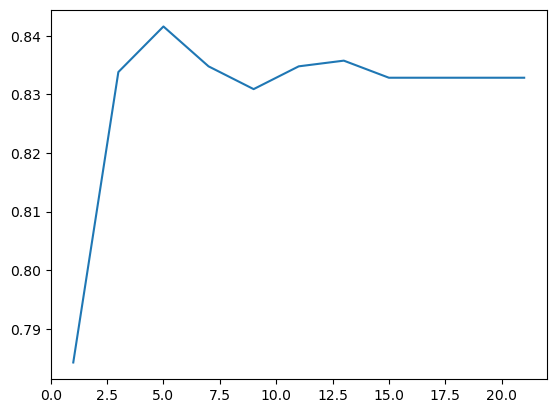

In [61]:
#Using K-fold cross validation technique we will find the best value of K
k_value = [1,3,5,7,9,11,13,15,17,19,21]
from sklearn.model_selection import cross_val_score
cv_score = []

for k in k_value:
    knnmodel = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knnmodel, x_train,y_train,cv=3, scoring='accuracy')
    cv_score.append(scores.mean())
    
cv_score
plt.plot(k_value, cv_score)
plt.show()
#The best value of K is coming out to be 7, we will retrain the model with the value of K as 7

In [62]:
#Applying the K-Nearest Neighbour on the training dataset
from sklearn.neighbors import KNeighborsClassifier
knnmodel_tuned = KNeighborsClassifier(n_neighbors=7)
knnmodel_tuned.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [63]:
#Running the model on the test dataset
y_pred_tuned = knnmodel_tuned.predict(x_test)

In [64]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_tuned)

0.8344671201814059

<a id="wknn"></a>
# 9. Applying Weighted K-Nearest Neighbour

In [66]:
#Applying the K-Nearest Neighbour on the training dataset
from sklearn.neighbors import KNeighborsClassifier
knnmodel_wt = KNeighborsClassifier(n_neighbors=7,weights='distance')
knnmodel_wt.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [67]:
#Running the model on the test dataset
y_pred_wt = knnmodel_wt.predict(x_test)

In [68]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_wt)

0.8344671201814059

In [69]:
# create an empty dataframe to store the scores for various algorithms
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_auc_score, f1_score
score_card = pd.DataFrame(columns=['model_name','Accuracy Score','Precision Score','Recall Score','AUC Score','f1 Score'])

In [70]:
# Function to update the score card
def update_score_card(y_test, y_pred, model_name):
    global score_card

    # Create a new row with the scores
    new_row = {
        'model_name': model_name,
        'Accuracy Score': accuracy_score(y_test, y_pred),
        'Precision Score': precision_score(y_test, y_pred, average='weighted'),
        'Recall Score': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

    # Add the new row to the score_card DataFrame using pd.concat
    score_card = pd.concat([score_card, pd.DataFrame([new_row])], ignore_index=True)

# Initialize the score_card DataFrame if it doesn't already exist
if 'score_card' not in globals():
    score_card = pd.DataFrame(columns=['model_name', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])

# Example usage
update_score_card(y_test, y_pred_ini, 'initial_model')
print(score_card)


      model_name  Accuracy Score  Precision Score  Recall Score AUC Score  \
0  initial_model        0.820862         0.773667      0.820862       NaN   

  f1 Score  F1 Score  
0      NaN  0.791846  


C:\Users\HP\AppData\Local\Temp\ipykernel_22944\226126770.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  score_card = pd.concat([score_card, pd.DataFrame([new_row])], ignore_index=True)


In [71]:
update_score_card(y_test,y_pred_tuned,'tuned_model')

In [72]:
update_score_card(y_test,y_pred_wt,'Weighted KNN')

In [73]:
score_card

,model_name,Accuracy Score,Precision Score,Recall Score,AUC Score,f1 Score,F1 Score
0,initial_model,0.820862,0.773667,0.820862,NaN,NaN,0.791846
1,tuned_model,0.834467,0.772613,0.834467,NaN,NaN,0.792468
2,Weighted KNN,0.834467,0.772613,0.834467,NaN,NaN,0.792468


**Interpretation: There is an increase in the accuracy after fine tuning the hyperparameter, however, there is not difference between normal KNN and weighted KNN in the accuracy point of view**